In [2]:
import time
import math
import random
from matplotlib import pyplot
%matplotlib inline
import numpy


<h2> Problem 1

In [3]:
def poisson_pdf(k, L):
    p = L**k*math.exp(-L)/math.factorial(k)
    return p

In [4]:
num_points = 10000000
average = 50 # lambda 
T = 10
dict_num_lists = dict()

i = 0 
while i < num_points: 
    t = T*numpy.random.rand()
    n = numpy.random.poisson(average*t/T)
    if n in dict_num_lists:
        dict_num_lists[n].append(t)
    else:
        dict_num_lists[n] = [t]
    i = i + 1
    

In [5]:
L = float(average)
def P_t_n(t,n):
    return (L/(T*numpy.math.factorial(int(n))))*numpy.power((L*t/T),n)*numpy.exp(-L*t/T)/(1-numpy.exp(-L)*numpy.sum([numpy.power(L,k)/numpy.math.factorial(int(k)) for k in range(0,int(n)+1)]))


In [6]:
num_time_bins = 100
time_bins = [None]*(num_time_bins+1)
for i in range(0, num_time_bins+1):
    time_bins[i] = T*i/num_time_bins
    

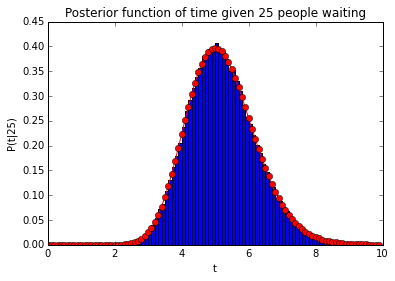

In [7]:
Nobs = 25
hist_times = pyplot.hist(dict_num_lists[Nobs], time_bins, normed=True)
t1 = numpy.arange(0.0, T, T/100.)
pred_times = pyplot.plot(t1,P_t_n(t1,Nobs),'ro-')
pyplot.title('Posterior function of time given %d people waiting' % Nobs)
pyplot.xlabel('t')
pyplot.ylabel('P(t|%d)' % Nobs)

In [8]:
Nmax = int(average*1.5)
plot_array = numpy.ndarray((Nmax))

for n in range(0, int(Nmax)):
    time_list = dict_num_lists.get(n, [])
    num_of_times = len(time_list)
    total_time = sum(time_list)
    expected_time = total_time / num_of_times
    plot_array[n] = expected_time


In [9]:
n_vec = [j for j in range(0,int(Nmax)+1)]
t_w = [T*(1-(n+1)/L*(1-numpy.exp(-L)*numpy.sum([numpy.power(L,k)/numpy.math.factorial(int(k)) for k in range(0,n+2)]))/(1-numpy.exp(-L)*numpy.sum([numpy.power(L,k)/numpy.math.factorial(int(k)) for k in range(0,n+1)]))) for n in n_vec]

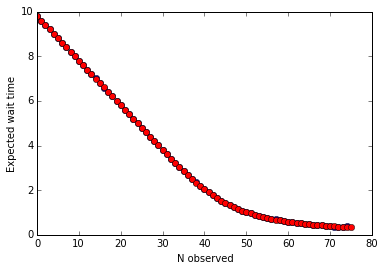

In [10]:
plot_array2 = T - plot_array
pyplot.plot(plot_array2, 'bo')
pyplot.xlabel("N observed")
pyplot.ylabel("Expected wait time")
pyplot.plot(n_vec,t_w,'ro--')
pyplot.show()

<h2> Problem 2

In [11]:
num_points = 10000000
max_num = 15
num_num_lists = dict()

i = 0 
while i < num_points: 
    lam = numpy.random.rand() * max_num
    N = numpy.random.poisson(lam)
    M = numpy.random.poisson(lam)
    if N in num_num_lists:
        num_num_lists[N].append(M)
    else:
        num_num_lists[N] = [M]
    i = i + 1
    

In [12]:
def poisson2(m1,m2,N):
    M_vec = [j+m1 for j in range(0,int(m2)+1)]
    return [numpy.math.factorial(int(m+N))/(numpy.math.factorial(m)*numpy.math.factorial(int(N))*numpy.power(2,N+m+1)) for m in M_vec]


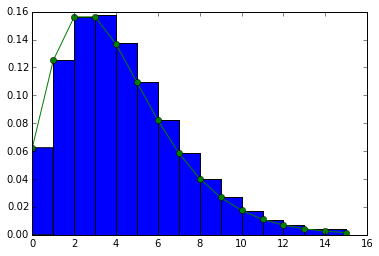

In [13]:
num_bins = range(0, max_num+1)
N_seen = 3
hist_nums = pyplot.hist(num_num_lists[N_seen], num_bins, normed=True)
pyplot.plot([j for j in range(0,max_num+1)], poisson2(0.,max_num,N_seen),'go-')

<h3> Perfect agreement for all plots!

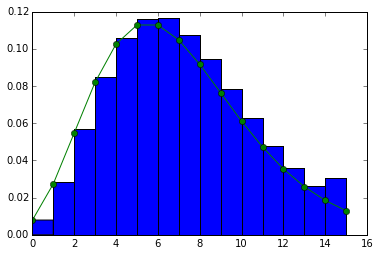

In [14]:
N_seen = 6
hist_nums = pyplot.hist(num_num_lists[N_seen], num_bins, normed=True)
pyplot.plot([j for j in range(0,max_num+1)], poisson2(0.,max_num,N_seen),'go-')